In [1]:
import cdflib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
from datetime import datetime

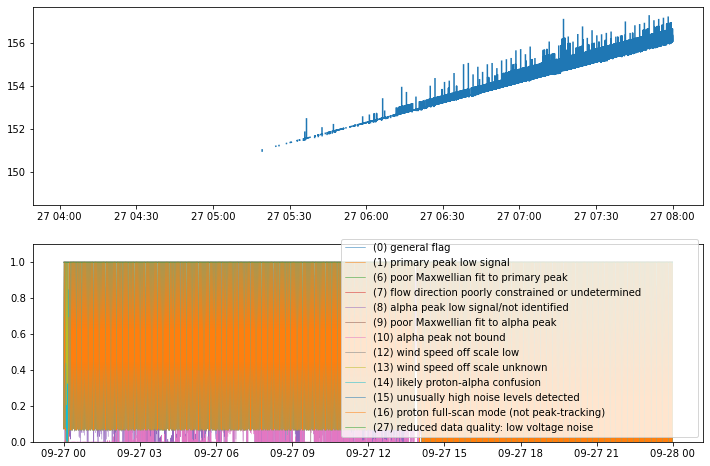

In [11]:
cdfPath = "/home/diegodp/Documents/PhD/Paper_2/InsituEMDCorrelation/unsafe/Resources/PSP_Data/SWEAP/psp_swp_spc_l3i_20200927_v02.cdf"

def readPlotPSP(cdfPath, altSpeed = "vp_moment_RTN"):
	df = pd.DataFrame({})
	cdf = cdflib.CDF(cdfPath)
	t = cdflib.cdfepoch().to_datetime(cdf["Epoch"])
	for i, label in enumerate(["R", "T", "N"]):
		df["V_" + str(label)] = cdf[altSpeed][:, i]
	
	df2 = pd.DataFrame({}, index=t)
	
	for i, flagName in enumerate(cdf["DQF_FLAGNAMES"][0]):
		df2[str(flagName)] = cdf["DQF"][:,i]

	# Build figure
	fig, axs = plt.subplots(2,1, figsize=(12,8))
	df["flag"] = cdf["general_flag"]
	df.index = t
	df[df["V_R"] < 0] = np.nan 
	df = df[datetime(2020, 9, 27, 4): datetime(2020,9,27,8)]

	df2 = df2.resample("60s").mean()
	axs[0].plot(df["V_R"])

	for flagName in cdf["DQF_FLAGNAMES"][0]:
		if 1 in df2[str(flagName)].values:
			axs[1].plot(df2[str(flagName)], label=str(flagName), linewidth=0.5)
		
	plt.ylim(0, 1.1)
	plt.legend()
	plt.show()

cdf = readPlotPSP(cdfPath)

In [12]:
folderRPW = "/home/diegodp/Documents/PhD/Paper_2/InsituEMDCorrelation/unsafe/Resources/Solo_Data/L3/RPW/"
folderSWEAP = "/home/diegodp/Documents/PhD/Paper_2/InsituEMDCorrelation/unsafe/Resources/Solo_Data/L2/GroundMom/"

def extractDF(CDFfolder, vars, info=False):
	firstFile = True
	for fileName in sorted(glob(f"{CDFfolder}*.cdf")):
		_cdf = cdflib.CDF(fileName)

		if info and firstFile:
			print(_cdf.cdf_info())
			raise ValueError("Set info to false")

		_t = cdflib.cdfepoch().to_datetime(_cdf["Epoch"])

		varDic = {}

		for var in vars:
			if var != "VEL":
				varDic[var] = _cdf[var]
			
			else:
				for i, subVar in enumerate(["V_R", "V_T", "V_N"]):
					varDic[subVar] = _cdf[var][:, 1]

		if firstFile == True:
			_df = pd.DataFrame(varDic, index=_t)
		else:
			_df = _df.append(pd.DataFrame(varDic, index=_t))
		
		firstFile = False
	
	return _df


# SolO
# Get RPW density
_dfDensRPW = extractDF(folderRPW, ["DENSITY"])

# Get SWEAP Density
_dfDensSWEAP = extractDF(folderSWEAP, ["N"])

plt.figure(figsize=(12, 8))
_dfDensRPW[_dfDensRPW["DENSITY"] < 0] = np.nan

_dfDensRPW = _dfDensRPW[datetime(2020, 9, 27, 4): datetime(2020,9,27,8)]
_dfDensSWEAP = _dfDensSWEAP[datetime(2020, 9, 27, 4): datetime(2020,9,27,8)]

plt.plot(_dfDensRPW["DENSITY"], alpha = 0.3)
plt.plot(_dfDensSWEAP["N"])
plt.show()


KeyError: datetime.datetime(2020, 9, 27, 4, 0)

<Figure size 864x576 with 0 Axes>

In [4]:
folderPSPSPANAI= "/home/diegodp/Documents/PhD/Paper_2/InsituEMDCorrelation/unsafe/Resources/PSP_Data/SWEAP/SPAN-AI/"

# TODO: Check that the coordinate system is RTN or can be converted
# TODO: Check what other variables are relevant
dfPSP = extractDF(folderPSPSPANAI, ["VEL"], info=True)
dfPSP[dfPSP["V_R"] > 400] = np.nan
dfPSP["V_R"].plot()
plt.show()


{'CDF': PosixPath('/home/diegodp/Documents/PhD/Paper_2/InsituEMDCorrelation/unsafe/Resources/PSP_Data/SWEAP/SPAN-AI/psp_swp_spi_sf00_L3_mom_INST_20200921_v03.cdf'), 'Version': '3.7.1', 'Encoding': 6, 'Majority': 'Column_major', 'rVariables': [], 'zVariables': ['Epoch', 'TIME', 'MET', 'APID', 'SEQN', 'SEQN_DELTA', 'SEQN_GROUP', 'PKT_SIZE', 'SOURCE_APID', 'SOURCE_HASH', 'COMPR_RATIO', 'NDAT', 'DATASIZE', 'LTCSNNNN_BITS', 'ARCH_BITS', 'MODE2_ORI', 'MODE2', 'F0', 'STATUS_BITS', 'PEAK_BIN', 'PRODUCT_BITS', 'NUM_TOTAL', 'NUM_ACCUM', 'TIME_TOTAL', 'TIME_ACCUM', 'CNTS', 'GAP', 'QUALITY_FLAG', 'DENS', 'VEL', 'T_TENSOR', 'TEMP', 'MAGF_SC', 'MAGF_INST', 'EFLUX_VS_ENERGY', 'EFLUX_VS_THETA', 'EFLUX_VS_PHI', 'ENERGY_VALS', 'THETA_VALS', 'PHI_VALS', 'ROTMAT_SC_INST'], 'Attributes': [{'Acknowledgement': 'Global'}, {'Project': 'Global'}, {'Source_name': 'Global'}, {'TITLE': 'Global'}, {'Discipline': 'Global'}, {'Descriptor': 'Global'}, {'Data_type': 'Global'}, {'Data_version': 'Global'}, {'TEXT': 'Glob

ValueError: Set info to false